In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


Data Load and Visualization

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import time

import numpy as np
df = pd.read_csv('/gdrive/MyDrive/Network_DataAnalysis/Project/Single_EDFA_Dataset.csv')

inat_columns = [col for col in df.columns if col.startswith('inat')]

outnat_columns = [col for col in df.columns if col.startswith('outat')]


assert len(inat_columns) == len(outnat_columns)


input_matrix = df[inat_columns].copy()
output_matrix = df[outnat_columns].copy()


display(input_matrix)
display(output_matrix)


,inat152782,inat152829,inat152876,inat152923,inat152970,inat153017,inat153064,inat153111,inat153158,inat153205,...,inat156260,inat156307,inat156354,inat156401,inat156448,inat156495,inat156542,inat156589,inat156636,inat156683
0,-20.262,-19.152,-19.402,-18.902,-19.052,-19.192,-19.172,-19.092,-19.212,-18.842,...,-16.472,-16.342,-16.282,-16.092,-15.972,-15.682,-15.452,-15.492,-15.582,-15.732
1,-20.798,-19.688,-20.338,-19.888,-19.898,-19.918,-19.868,-19.838,-19.858,-19.528,...,-17.418,-17.378,-17.168,-16.988,-16.898,-16.648,-16.328,-16.248,-16.288,-16.608
2,-21.227,-20.627,-21.417,-20.827,-20.847,-20.797,-20.807,-20.727,-20.787,-20.267,...,-18.377,-18.157,-18.017,-17.937,-17.787,-17.537,-17.187,-17.027,-16.897,-17.367
3,-23.007,-22.307,-22.907,-22.247,-22.187,-22.367,-22.217,-22.137,-22.287,-21.917,...,-19.877,-19.697,-19.537,-19.477,-19.287,-19.057,-18.757,-18.587,-18.237,-18.587
4,-24.132,-23.302,-23.952,-23.342,-23.122,-23.532,-23.632,-23.752,-23.772,-23.452,...,-20.952,-20.832,-20.622,-20.532,-20.432,-20.212,-19.862,-19.592,-19.262,-19.492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16492,-22.505,-22.115,-22.765,-22.235,-22.135,-22.335,-22.125,-22.065,-22.015,-21.735,...,-23.625,-23.525,-23.415,-23.265,-22.955,-22.525,-22.195,-22.065,-21.735,-21.315
16493,-23.770,-23.090,-23.690,-23.280,-23.010,-23.670,-23.670,-23.730,-23.640,-23.360,...,-24.570,-24.500,-24.480,-24.280,-23.960,-23.680,-23.280,-23.100,-22.790,-22.300
16494,-24.769,-24.109,-24.669,-24.539,-24.569,-24.629,-24.349,-24.259,-24.169,-23.839,...,-25.339,-25.349,-25.289,-25.229,-24.899,-24.609,-24.379,-24.119,-23.669,-23.219
16495,-25.724,-24.864,-25.824,-25.354,-25.134,-25.354,-25.324,-25.294,-25.104,-24.714,...,-26.244,-26.234,-26.154,-26.154,-25.834,-25.574,-25.274,-25.104,-24.624,-24.074


,outat152782,outat152829,outat152876,outat152923,outat152970,outat153017,outat153064,outat153111,outat153158,outat153205,...,outat156260,outat156307,outat156354,outat156401,outat156448,outat156495,outat156542,outat156589,outat156636,outat156683
0,-18.736,-17.176,-16.996,-16.116,-15.856,-15.616,-15.196,-14.746,-14.536,-13.786,...,-0.876,-0.896,-0.916,-0.936,-0.966,-0.846,-0.826,-1.136,-1.446,-2.486
1,-17.462,-15.902,-16.152,-15.302,-14.902,-14.552,-14.142,-13.752,-13.432,-12.792,...,-1.062,-1.142,-1.082,-1.142,-1.192,-1.162,-1.052,-1.212,-1.502,-2.752
2,-15.955,-14.875,-15.225,-14.225,-13.875,-13.475,-13.095,-12.735,-12.505,-11.625,...,-1.285,-1.275,-1.295,-1.375,-1.455,-1.385,-1.265,-1.365,-1.515,-2.945
3,-14.989,-13.799,-13.949,-12.859,-12.579,-12.359,-11.799,-11.439,-11.449,-10.709,...,-1.599,-1.589,-1.619,-1.759,-1.849,-1.819,-1.749,-1.849,-1.799,-3.219
4,-14.292,-12.942,-13.162,-12.062,-11.612,-11.682,-11.432,-11.282,-11.222,-10.582,...,-1.692,-1.842,-1.812,-1.982,-2.152,-2.142,-2.052,-2.052,-2.072,-3.272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16492,-11.438,-10.788,-11.028,-9.968,-9.728,-9.418,-8.978,-8.688,-8.548,-7.968,...,-3.938,-4.078,-4.128,-4.208,-4.258,-4.028,-4.018,-4.198,-4.138,-5.968
16493,-11.105,-10.165,-10.365,-9.455,-9.005,-9.335,-8.995,-8.765,-8.675,-8.085,...,-4.145,-4.345,-4.385,-4.565,-4.505,-4.465,-4.335,-4.535,-4.565,-6.455
16494,-10.572,-9.582,-9.842,-9.172,-8.942,-8.572,-8.072,-7.802,-7.682,-7.132,...,-4.142,-4.492,-4.612,-4.792,-4.772,-4.762,-4.832,-4.862,-4.772,-6.812
16495,-9.912,-8.852,-9.602,-8.412,-8.132,-7.962,-7.642,-7.362,-7.142,-6.522,...,-4.382,-4.802,-4.802,-5.152,-5.152,-5.092,-5.142,-5.292,-5.182,-7.162


Training KNN model......
Training duration with N=1 : 0.9547 seconds
Mean Squared Error with N=1 : 0.1966251432323234
Mean Absolute Error with N=1 : 0.2780373448773446
R2 score with N=1 : 0.9524327190725134
Training KNN model......
Training duration with N=2 : 1.6613 seconds
Mean Squared Error with N=2 : 0.15658436716089466
Mean Absolute Error with N=2 : 0.24730258658008641
R2 score with N=2 : 0.9602623154066509
Training KNN model......
Training duration with N=3 : 1.5360 seconds
Mean Squared Error with N=3 : 0.15451762623055962
Mean Absolute Error with N=3 : 0.2439816161616162
R2 score with N=3 : 0.9603717813670356
Training KNN model......
Training duration with N=4 : 1.1470 seconds
Mean Squared Error with N=4 : 0.1624670663501083
Mean Absolute Error with N=4 : 0.24711789141414153
R2 score with N=4 : 0.9573819632021807
Training KNN model......
Training duration with N=5 : 1.4520 seconds
Mean Squared Error with N=5 : 0.16940817676709963
Mean Absolute Error with N=5 : 0.2512112308802309

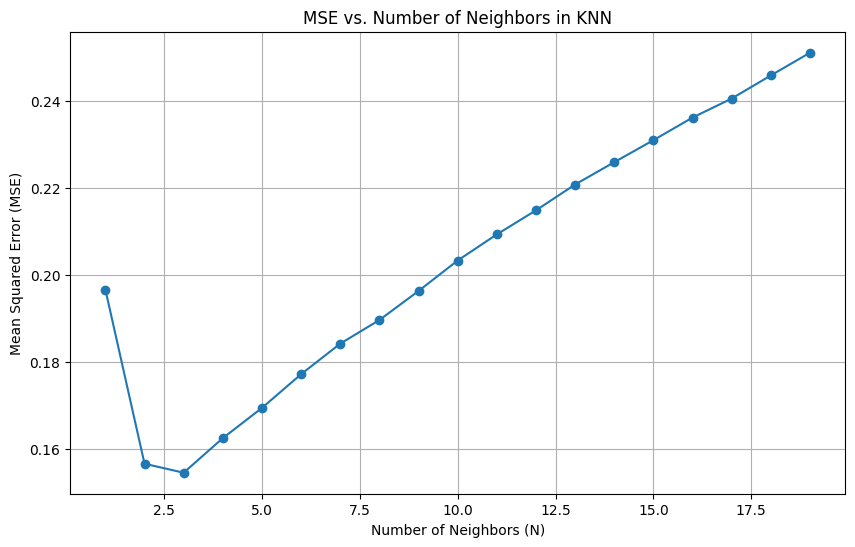

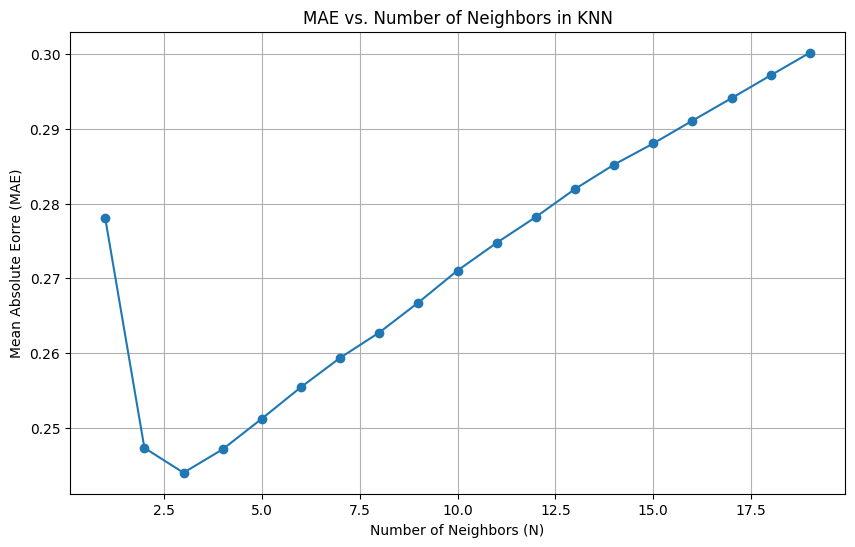

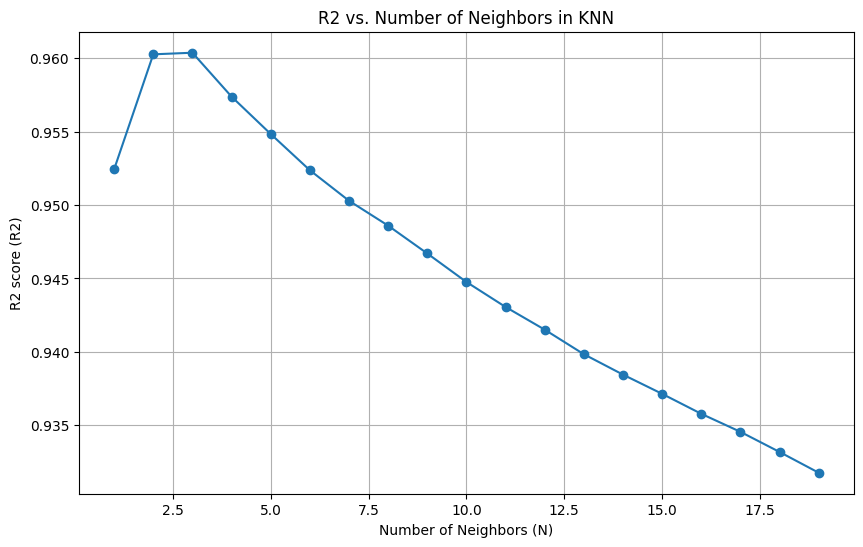

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import time

import numpy as np


X_train, X_test, y_train, y_test = train_test_split(input_matrix, output_matrix, test_size=0.2, random_state=42)

n_neighbors = range(1, 20)
mse_values = []
r2_values=[]
mae_values=[]
train_durations=[]

for n in n_neighbors:
    start_time = time.time()
    knn = KNeighborsRegressor(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    print(f'Training KNN model......')

    training_duration = time.time() - start_time
    train_durations.append(training_duration)

    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

    score=r2_score(y_test,y_pred)
    r2_values.append(score)

    mae = mean_absolute_error(y_test, y_pred)
    mae_values.append(mae)


    print(f'Training duration with N={n} : {training_duration:.4f} seconds')
    print(f'Mean Squared Error with N={n} : {mse}')
    print(f'Mean Absolute Error with N={n} : {mae}')
    print(f'R2 score with N={n} : {score}')

plt.figure(figsize=(10, 6))
plt.plot(n_neighbors, mse_values, marker='o', linestyle='-')
plt.xlabel('Number of Neighbors (N)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs. Number of Neighbors in KNN')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(n_neighbors, mae_values, marker='o', linestyle='-')
plt.xlabel('Number of Neighbors (N)')
plt.ylabel('Mean Absolute Eorre (MAE)')
plt.title('MAE vs. Number of Neighbors in KNN')
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(n_neighbors, r2_values, marker='o', linestyle='-')
plt.xlabel('Number of Neighbors (N)')
plt.ylabel('R2 score (R2)')
plt.title('R2 vs. Number of Neighbors in KNN')
plt.grid(True)
plt.show()


KNN Standardize

Training KNN model......
Training duration with N=1 : 0.4109 seconds
Mean Squared Error with N=1 : 0.1995089313852815
Mean Absolute Error with N=1 : 0.2780340404040401
R2 score with N=1 : 0.9547460851765434
Training KNN model......
Training duration with N=2 : 0.4652 seconds
Mean Squared Error with N=2 : 0.1589903122222222
Mean Absolute Error with N=2 : 0.24693716810966798
R2 score with N=2 : 0.9623090064496593
Training KNN model......
Training duration with N=3 : 0.6627 seconds
Mean Squared Error with N=3 : 0.15535839219977557
Mean Absolute Error with N=3 : 0.24373080567580563
R2 score with N=3 : 0.9620301127041065
Training KNN model......
Training duration with N=4 : 0.8252 seconds
Mean Squared Error with N=4 : 0.16181222994949507
Mean Absolute Error with N=4 : 0.24629696969696968
R2 score with N=4 : 0.9595993130412158
Training KNN model......
Training duration with N=5 : 0.7846 seconds
Mean Squared Error with N=5 : 0.168746084146609
Mean Absolute Error with N=5 : 0.25007204473304473

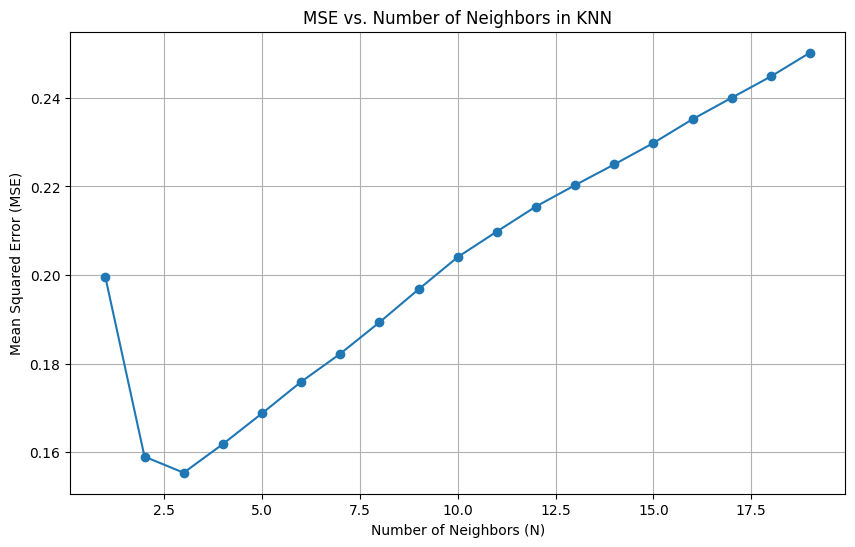

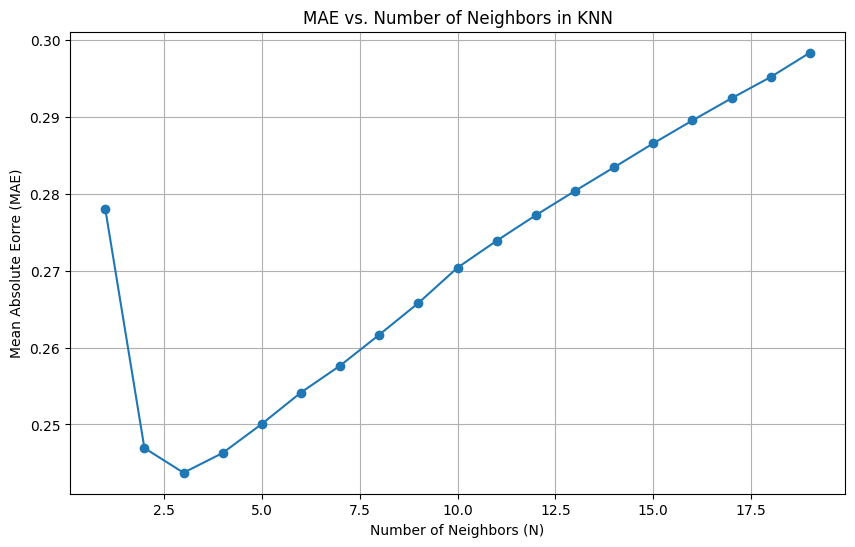

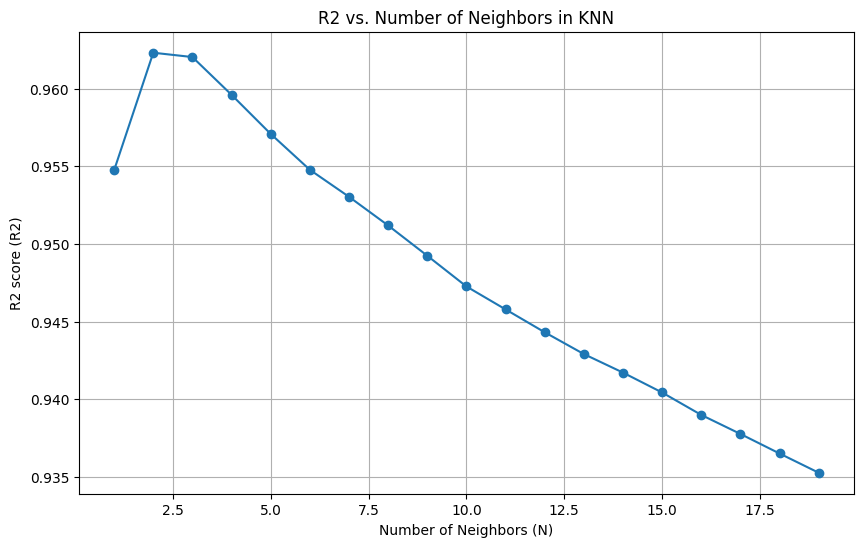

In [17]:
from sklearn.preprocessing import StandardScaler


scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)



n_neighbors = range(1, 20)
mse_values = []
r2_values=[]
mae_values=[]
train_durations=[]

for n in n_neighbors:
    start_time = time.time()
    knn = KNeighborsRegressor(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    print(f'Training KNN model......')

    training_duration = time.time() - start_time
    train_durations.append(training_duration)

    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

    score=r2_score(y_test,y_pred)
    r2_values.append(score)

    mae = mean_absolute_error(y_test, y_pred)
    mae_values.append(mae)


    print(f'Training duration with N={n} : {training_duration:.4f} seconds')
    print(f'Mean Squared Error with N={n} : {mse}')
    print(f'Mean Absolute Error with N={n} : {mae}')
    print(f'R2 score with N={n} : {score}')

plt.figure(figsize=(10, 6))
plt.plot(n_neighbors, mse_values, marker='o', linestyle='-')
plt.xlabel('Number of Neighbors (N)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs. Number of Neighbors in KNN')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(n_neighbors, mae_values, marker='o', linestyle='-')
plt.xlabel('Number of Neighbors (N)')
plt.ylabel('Mean Absolute Eorre (MAE)')
plt.title('MAE vs. Number of Neighbors in KNN')
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(n_neighbors, r2_values, marker='o', linestyle='-')
plt.xlabel('Number of Neighbors (N)')
plt.ylabel('R2 score (R2)')
plt.title('R2 vs. Number of Neighbors in KNN')
plt.grid(True)
plt.show()


Random Forest Regression

Training duration with 10 estimators: 33.3153 seconds
Mean Squared Error with 10 estimators: 0.2834089541457431
Mean Absolute Error with 10 estimators: 0.30727269408369406
R2 score with 10 estimators: 0.9315302530127202
Training duration with 40 estimators: 135.6732 seconds
Mean Squared Error with 40 estimators: 0.2414639065305375
Mean Absolute Error with 40 estimators: 0.27781674404761914
R2 score with 40 estimators: 0.9409720223596884
Training duration with 70 estimators: 234.9711 seconds
Mean Squared Error with 70 estimators: 0.23683451267246514
Mean Absolute Error with 70 estimators: 0.27367330426716135
R2 score with 70 estimators: 0.9422204618763126
Training duration with 100 estimators: 336.6499 seconds
Mean Squared Error with 100 estimators: 0.23396168291688169
Mean Absolute Error with 100 estimators: 0.2714898432900433
R2 score with 100 estimators: 0.9429476599516194
Training duration with 130 estimators: 440.7051 seconds
Mean Squared Error with 130 estimators: 0.23307969575426

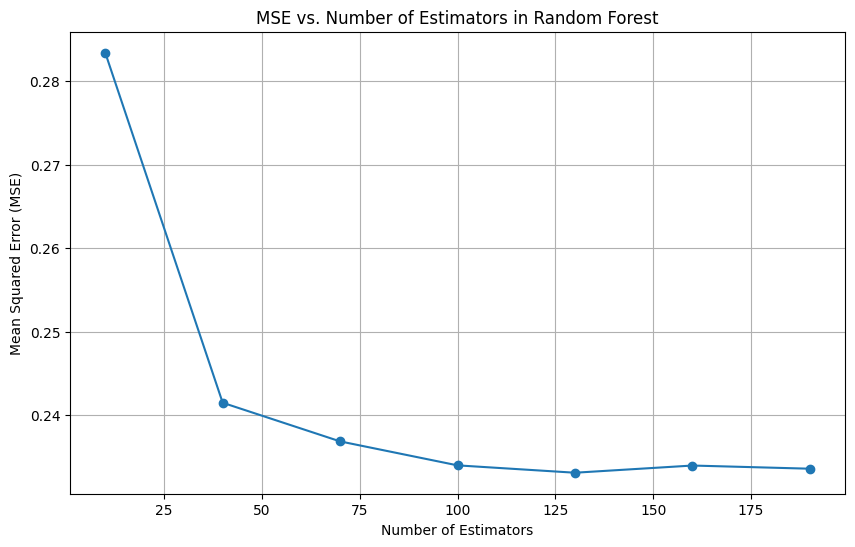

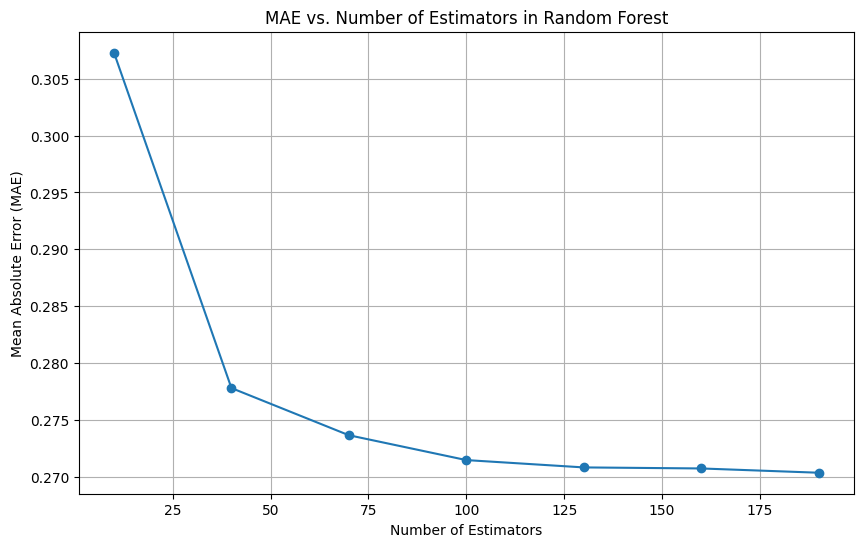

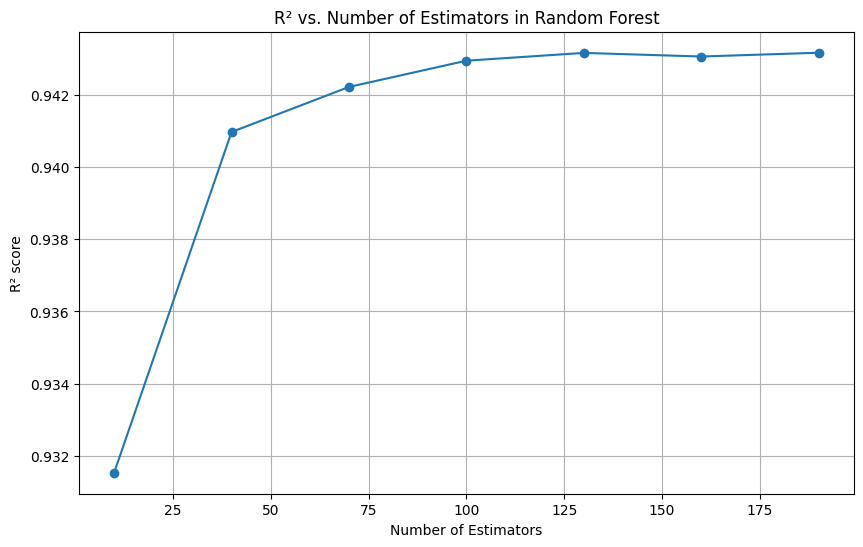

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import time

import numpy as np
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(input_matrix, output_matrix, test_size=0.2, random_state=42)

n_estimators_range = range(10, 220, 30)
mse_values_rf = []
mae_values_rf = []
r2_values_rf = []
train_durations_rf = []

for n in n_estimators_range:
    start_time = time.time()

    rf = RandomForestRegressor(n_estimators=n, random_state=42)
    rf.fit(X_train_rf, y_train_rf)

    training_duration = time.time() - start_time
    train_durations_rf.append(training_duration)

    y_pred_rf = rf.predict(X_test_rf)

    mse_rf = mean_squared_error(y_test_rf, y_pred_rf)
    mse_values_rf.append(mse_rf)

    mae_rf = mean_absolute_error(y_test_rf, y_pred_rf)
    mae_values_rf.append(mae_rf)

    r2_rf = r2_score(y_test_rf, y_pred_rf)
    r2_values_rf.append(r2_rf)


    print(f'Training duration with {n} estimators: {training_duration:.4f} seconds')


    print(f'Mean Squared Error with {n} estimators: {mse_rf}')
    print(f'Mean Absolute Error with {n} estimators: {mae_rf}')
    print(f'R2 score with {n} estimators: {r2_rf}')


plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, mse_values_rf, marker='o', linestyle='-')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs. Number of Estimators in Random Forest')
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, mae_values_rf, marker='o', linestyle='-')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE vs. Number of Estimators in Random Forest')
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, r2_values_rf, marker='o', linestyle='-')
plt.xlabel('Number of Estimators')
plt.ylabel('R² score')
plt.title('R² vs. Number of Estimators in Random Forest')
plt.grid(True)
plt.show()

Training duration with 10 estimators: 33.4918 seconds
Mean Squared Error with 10 estimators: 0.2833639300890331
Mean Absolute Error with 10 estimators: 0.3072593715728715
R2 score with 10 estimators: 0.9315306188012028
Training duration with 40 estimators: 135.8411 seconds
Mean Squared Error with 40 estimators: 0.24145167768759018
Mean Absolute Error with 40 estimators: 0.27782250216450227
R2 score with 40 estimators: 0.9409736306055033
Training duration with 70 estimators: 239.9073 seconds
Mean Squared Error with 70 estimators: 0.23684192669659565
Mean Absolute Error with 70 estimators: 0.2736800983302412
R2 score with 70 estimators: 0.9422187826612427
Training duration with 100 estimators: 337.8470 seconds
Mean Squared Error with 100 estimators: 0.2339517875102612
Mean Absolute Error with 100 estimators: 0.27148912619047616
R2 score with 100 estimators: 0.9429460584785528
Training duration with 130 estimators: 441.3716 seconds
Mean Squared Error with 130 estimators: 0.233058347157425

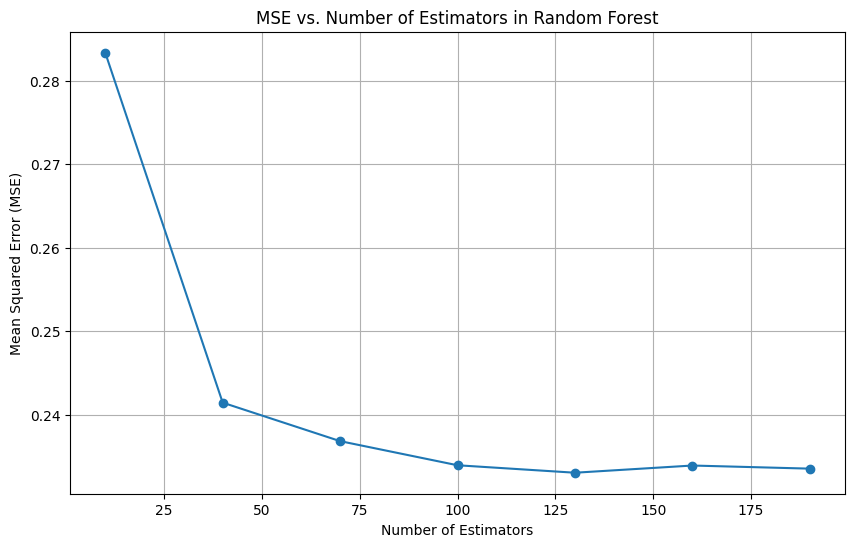

In [6]:
from sklearn.preprocessing import StandardScaler


scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_rf = scaler_X.fit_transform(X_train_rf)
X_test_rf = scaler_X.transform(X_test_rf)

n_estimators_range = range(10, 210, 30)
mse_values_rf = []
mae_values_rf = []
r2_values_rf = []
train_durations_rf = []

for n in n_estimators_range:
    start_time = time.time()

    rf = RandomForestRegressor(n_estimators=n, random_state=42)
    rf.fit(X_train_rf, y_train_rf)

    training_duration = time.time() - start_time
    train_durations_rf.append(training_duration)

    y_pred_rf = rf.predict(X_test_rf)

    mse_rf = mean_squared_error(y_test_rf, y_pred_rf)
    mse_values_rf.append(mse_rf)

    mae_rf = mean_absolute_error(y_test_rf, y_pred_rf)
    mae_values_rf.append(mae_rf)

    r2_rf = r2_score(y_test_rf, y_pred_rf)
    r2_values_rf.append(r2_rf)


    print(f'Training duration with {n} estimators: {training_duration:.4f} seconds')


    print(f'Mean Squared Error with {n} estimators: {mse_rf}')
    print(f'Mean Absolute Error with {n} estimators: {mae_rf}')
    print(f'R2 score with {n} estimators: {r2_rf}')


plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, mse_values_rf, marker='o', linestyle='-')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs. Number of Estimators in Random Forest')
plt.grid(True)
plt.show()


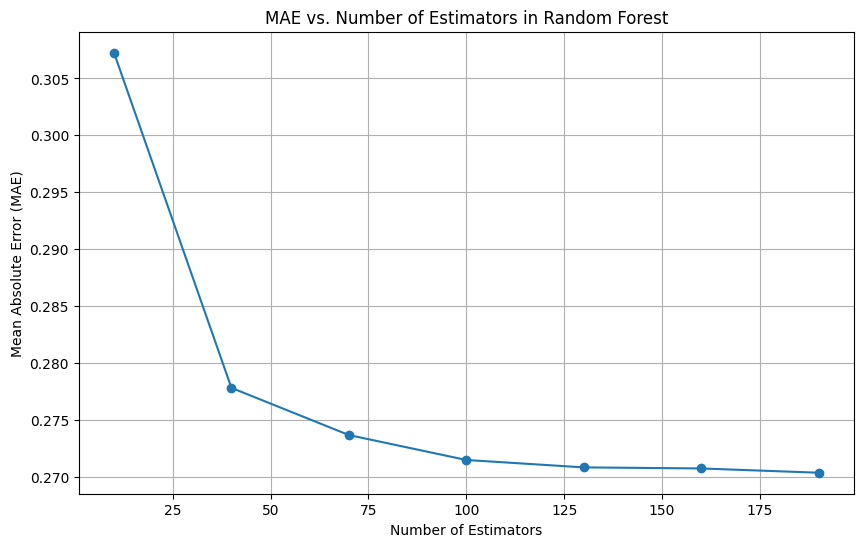

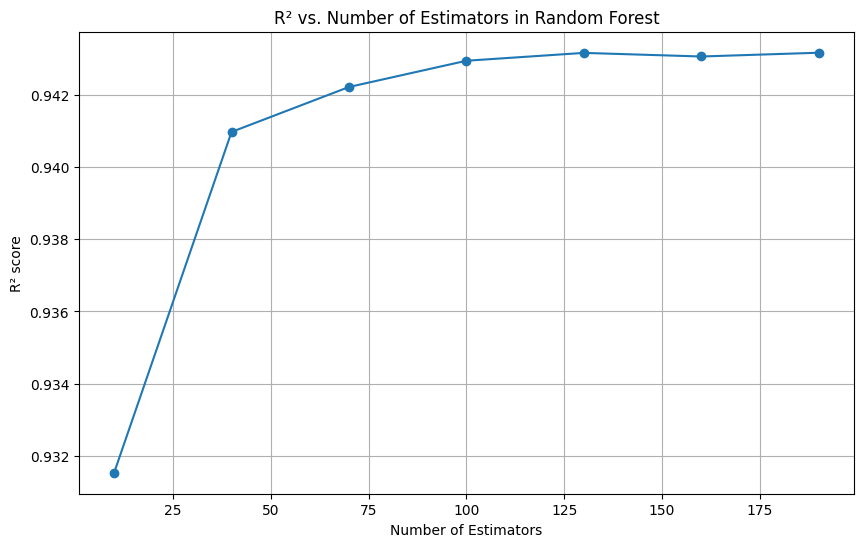

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, mae_values_rf, marker='o', linestyle='-')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE vs. Number of Estimators in Random Forest')
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, r2_values_rf, marker='o', linestyle='-')
plt.xlabel('Number of Estimators')
plt.ylabel('R² score')
plt.title('R² vs. Number of Estimators in Random Forest')
plt.grid(True)
plt.show()

From the Result of The KNN and Random Forest Regressor, we find the optimal value for the KNN is 3 and the optimal estimator number for the Random Forest Regressor is 220. We will use those parameter to our next steps

In [49]:
def select_columns(df_in, df_out, step):
    if step <= 0:
        raise ValueError("Step must be a positive integer.")

    inat_columns = [col for col in df_in.columns if col.startswith('inat')]

    outnat_columns = [col for col in df_out.columns if col.startswith('outat')]


    selected_inat_columns = inat_columns[::step]
    skipped_inat_columns = [col for col in inat_columns if col not in selected_inat_columns]

    selected_outnat_columns = outnat_columns[::step]
    skipped_outnat_columns = [col for col in outnat_columns if col not in selected_outnat_columns]


    return df_in[selected_inat_columns], df_out[selected_outnat_columns]

In [28]:
del X_test,y_test,Input_select, Output_select, Input_skip, Output_skip

In [54]:
train_durations = []
mse_values = []
mae_values = []
r2_values = []

steps = [1, 2, 5, 10, 20, 50, 70, 88]

for step in steps:
    if step==1:
      X_train_select, X_test, y_train_select, y_test = train_test_split(input_matrix, output_matrix, test_size=0.2, random_state=42)
    else:
      X_train, X_test, y_train, y_test = train_test_split(input_matrix, output_matrix, test_size=0.2, random_state=42)
      X_train_select,y_train_select=select_columns(X_train,y_train,step)

    start_time = time.time()

    knn = KNeighborsRegressor(n_neighbors=3)
    knn.fit(X_train_select, y_train_select)

    y_pred = knn.predict(X_test)

    print('Training KNN model...')

    training_duration = time.time() - start_time
    train_durations.append(training_duration)

    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

    score = r2_score(y_test, y_pred)
    r2_values.append(score)

    mae = mean_absolute_error(y_test, y_pred)
    mae_values.append(mae)

    print(f'Training duration with step={step} : {training_duration:.4f} seconds')
    print(f'Mean Squared Error with step={step} : {mse}')
    print(f'Mean Absolute Error with step={step} : {mae}')
    print(f'R2 score with step={step} : {score}')

plt.figure(figsize=(14, 6))


plt.subplot(1, 3, 1)
plt.plot(steps, r2_values, marker='o')
plt.title('R2 Score vs Step Size')
plt.xlabel('Step Size')
plt.ylabel('R2 Score')


plt.subplot(1, 3, 2)
plt.plot(steps, mae_values, marker='o')
plt.title('MAE vs Step Size')
plt.xlabel('Step Size')
plt.ylabel('MAE')


plt.subplot(1, 3, 3)
plt.plot(steps, mse_values, marker='o')
plt.title('MSE vs Step Size')
plt.xlabel('Step Size')
plt.ylabel('MSE')

Training KNN model...
Training duration with step=1 : 0.3982 seconds
Mean Squared Error with step=1 : 0.15451762623055962
Mean Absolute Error with step=1 : 0.2439816161616162
R2 score with step=1 : 0.9603717813670356


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- inat152829
- inat152923
- inat153017
- inat153111
- inat153205
- ...


In [42]:
Input_select, Output_select, Input_skip, Output_skip = select_columns(input_matrix, output_matrix, 2)
X_train_select, X_test_select, y_train_select, y_test_select = train_test_split(Input_select, Output_select, test_size=0.2, random_state=42)
Input_skip = Input_skip.head(X_test_select.shape[0])
Output_skip = Output_skip.head(y_test_select.shape[0])
X_test = pd.concat([X_test_select, Input_skip], axis=1)
y_test = pd.concat([y_test_select, Output_skip], axis=1)

In [51]:
display(X_test)

,inat152782,inat152829,inat152876,inat152923,inat152970,inat153017,inat153064,inat153111,inat153158,inat153205,...,inat156260,inat156307,inat156354,inat156401,inat156448,inat156495,inat156542,inat156589,inat156636,inat156683
3207,-24.085,-23.795,-24.695,-25.015,-25.015,-25.115,-25.435,-25.715,-26.285,-26.215,...,-18.195,-18.245,-18.085,-17.785,-17.435,-17.305,-17.275,-17.395,-17.575,-18.515
5890,-23.716,-22.896,-23.546,-23.026,-22.826,-23.046,-23.206,-23.426,-23.606,-23.086,...,-21.186,-21.206,-21.206,-21.096,-20.996,-20.826,-20.616,-20.356,-19.926,-20.186
8812,-20.523,-19.843,-20.273,-19.853,-19.983,-19.933,-19.963,-19.963,-20.043,-19.613,...,-17.823,-17.713,-17.643,-17.553,-17.523,-17.403,-17.233,-17.133,-16.983,-17.543
12292,-25.128,-24.638,-24.788,-25.168,-24.548,-24.888,-24.508,-24.668,-24.478,-24.428,...,-25.198,-25.238,-25.188,-25.208,-25.068,-24.948,-24.858,-24.638,-24.108,-24.048
12352,-21.398,-21.638,-21.578,-21.438,-21.078,-21.218,-21.168,-21.298,-21.148,-21.018,...,-22.998,-23.208,-23.208,-23.288,-23.368,-23.248,-23.138,-23.128,-22.968,-22.958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
704,-23.840,-23.140,-23.820,-23.470,-23.240,-23.840,-24.050,-24.230,-24.330,-24.040,...,-16.220,-15.970,-15.620,-15.200,-14.870,-14.630,-14.720,-15.120,-15.420,-15.670
2417,-24.030,-23.760,-23.890,-23.450,-23.340,-23.880,-23.750,-23.690,-23.720,-23.390,...,-22.610,-22.620,-22.540,-22.520,-22.440,-22.190,-21.960,-21.790,-21.360,-21.340
2655,-20.250,-19.300,-19.490,-19.010,-19.220,-19.210,-19.070,-18.990,-19.050,-18.610,...,-17.890,-17.730,-17.700,-17.670,-17.610,-17.530,-17.440,-17.380,-17.200,-17.440
16415,-23.252,-22.872,-22.912,-23.052,-22.862,-23.632,-23.252,-23.512,-23.502,-23.482,...,-27.732,-27.742,-27.832,-28.022,-27.932,-27.922,-27.752,-27.662,-27.392,-27.192
